# Master equation model of the alanine octapeptide

First we import a number of libraries we will need as we run this example


In [58]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

import seaborn as sns
sns.set(style="ticks", color_codes=True, font_scale=1.2)
sns.set_style({"xtick.direction": "in", "ytick.direction": "in"})

### Discretizing the trajectory
We start loading the data using the data structures from the `trajectory` module. For this we use the external library [`MDtraj`](http://mdtraj.org), which contains all sorts of methods for parsing and calculating interestign properties of our time-series data.

In [59]:
from mastermsm.trajectory import traj
import mdtraj as md

In [60]:
tr = traj.TimeSeries(top='data/ALA8_helix_amber03w_wat_min.gro',\
                     traj=['data/traj_whole_s1.xtc'])
tr.mdt

<mdtraj.Trajectory with 200001 frames, 89 atoms, 10 residues, and unitcells at 0x7fa414a3cb00>

For example, we can access the $\phi$ and $\psi$ dihedrals for each of the aminoacids, which we will use in our discretization.

In [61]:
phi = md.compute_phi(tr.mdt)
psi = md.compute_psi(tr.mdt)
res = [x for x in tr.mdt.topology.residues]

For each of the amino acids, we visualize the distribution of Ramachandran angles.

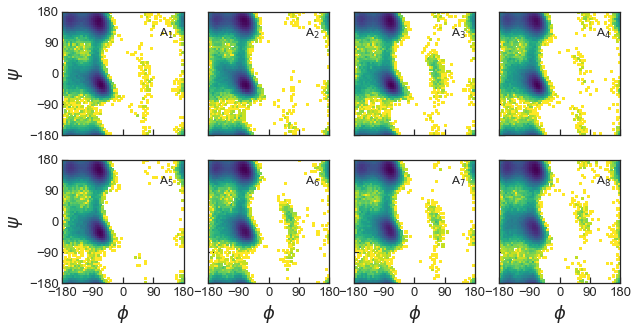

In [62]:
fig,ax = plt.subplots(2,4,figsize=(10,5), sharex=True, sharey=True)
k = 0
for i in range(2):
    for j in range(4):
        ax[i][j].hist2d(180./np.pi*phi[1][:,k],180./np.pi*psi[1][:,k], \
                    bins=[np.linspace(-180,180,60), \
                             np.linspace(-180,180,60)], \
                    cmap='viridis_r', \
                    norm=mpl.colors.LogNorm())
        ax[i][j].set_xlim(-180,180)
        ax[i][j].set_ylim(-180,180)
        ax[i][j].xaxis.set_ticks(range(-180,181,90))
        ax[i][j].yaxis.set_ticks(range(-180,181,90))
        ax[i][j].text(0.8, 0.8, "A$_%g$"%(k+1), fontsize=12, transform = ax[i][j].transAxes)
        #sns.jointplot(180./math.pi*phi[1][:,0],180./math.pi*psi[1][:,0], kind="kde", stat_func=None, ax=ax[i][j])
        k +=1
ax[0][0].set_ylabel(r'$\psi$', fontsize=18)
ax[1][0].set_ylabel(r'$\psi$', fontsize=18)
for j in range(4):
    ax[1][j].set_xlabel(r'$\phi$', fontsize=18)
    

In [63]:
tr.discretize(states=['A', 'E'])

Now we check whether the discretization has captured the relevant dynamics at the single amino acid level. We look into residue 2, which remains fairly helical during the simulation timescale, and residue 8, which fluctuates a lot.

Text(0.5, 0, 'Time [ps]')

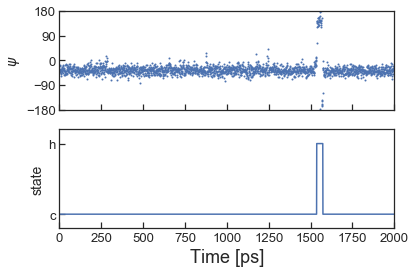

In [64]:
y = [0 if x[0] == 'A' else 1 for x in tr.distraj]
fig, (ax1, ax2) = plt.subplots(2,1, sharex=True)
ax1.plot(psi[1][:,0]*180/np.pi,'o', markersize=1)
ax2.plot(y)
ax1.set_xlim(0,2000)
ax1.set_ylim(-180,180)
ax1.yaxis.set_ticks(range(-180,181,90))
ax1.set_ylabel(r'$\psi$', fontsize=14)

ax2.set_ylabel(r'state', fontsize=14)
ax2.set_xlim(0,2000)
ax2.set_ylim(-0.2,1.2)
ax2.yaxis.set_ticks([0,1])
labels = [item.get_text() for item in ax2.get_xticklabels()]
labels[0] = 'c'
labels[1] = 'h'
ax2.set_yticklabels(labels)

ax2.set_xlabel('Time [ps]')
ax2.set_xlabel(r'Time [ps]', fontsize=18)


Text(0.5, 0, 'Time [ps]')

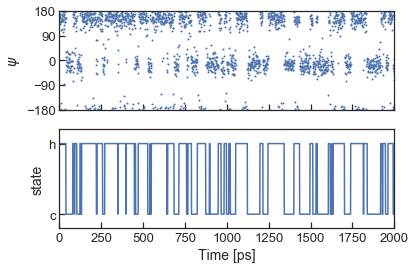

In [65]:
y = [0 if x[7] == 'A' else 1 for x in tr.distraj]

fig, (ax1, ax2) = plt.subplots(2,1, sharex=True)
ax1.plot(psi[1][:,7]*180/np.pi,'o', markersize=1)
ax2.plot(y)

ax1.set_ylabel(r'$\psi$', fontsize=14)
ax1.set_xlim(0,2000)
ax1.set_ylim(-180,180)
ax1.yaxis.set_ticks(range(-180,181,90))

ax2.set_ylabel(r'state', fontsize=14)
ax2.set_xlim(0,2000)
ax2.set_ylim(-0.2,1.2)
ax2.yaxis.set_ticks([0,1])
labels = [item.get_text() for item in ax2.get_xticklabels()]
labels[0] = 'c'
labels[1] = 'h'
ax2.set_yticklabels(labels)

ax2.set_xlabel('Time [ps]')
ax2.set_xlabel(r'Time [ps]', fontsize=14)


In [66]:
tr.find_keys()
tr.keys
tr.file_name

['data/traj_whole_s1.xtc']

In [67]:
from mastermsm.msm import msm
msm_ala8 = msm.SuperMSM([tr])


 Building MSM from 
 [['data/traj_whole_s1.xtc']]
     # states: 243


In [68]:
for i in [10, 20, 50, 100, 200]:
    msm_ala8.do_msm(i)
    msm_ala8.msms[i].do_trans()
    msm_ala8.msms[i].boots(plot=False)

/home/daviddesancho/Research/code/MasterMSM/mastermsm/msm/msm_lib.py:527: RuntimeWarning: invalid value encountered in log
  tauT.append(-lagt/np.log(lamT))
/home/daviddesancho/Research/code/MasterMSM/mastermsm/msm/msm_lib.py:527: RuntimeWarning: invalid value encountered in log
  tauT.append(-lagt/np.log(lamT))
/home/daviddesancho/Research/code/MasterMSM/mastermsm/msm/msm_lib.py:527: RuntimeWarning: invalid value encountered in log
  tauT.append(-lagt/np.log(lamT))
/home/daviddesancho/Research/code/MasterMSM/mastermsm/msm/msm_lib.py:527: RuntimeWarning: invalid value encountered in log
  tauT.append(-lagt/np.log(lamT))
/home/daviddesancho/Research/code/MasterMSM/mastermsm/msm/msm_lib.py:527: RuntimeWarning: invalid value encountered in log
  tauT.append(-lagt/np.log(lamT))
/home/daviddesancho/Research/code/MasterMSM/mastermsm/msm/msm_lib.py:527: RuntimeWarning: invalid value encountered in log
  tauT.append(-lagt/np.log(lamT))
/home/daviddesancho/Research/code/MasterMSM/mastermsm/msm/

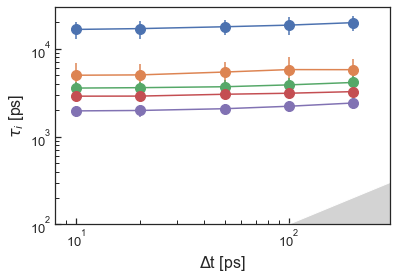

In [69]:
#msm_ala8.convergence_test(time=[10, 20, 50, 100, 200], error=True)
fig, ax = plt.subplots()
for i in range(5):
    tau_vs_lagt = np.array([[x,msm_ala8.msms[x].tauT[i],msm_ala8.msms[x].tau_std[i]] \
               for x in sorted(msm_ala8.msms.keys())])
    ax.errorbar(tau_vs_lagt[:,0],tau_vs_lagt[:,1],fmt='o-', yerr=tau_vs_lagt[:,2], markersize=10)
#ax.plot(tau_vs_lagt[:,0],tau_vs_lagt[:,0])
ax.fill_between(10**np.arange(-0.2,3,0.2), 1e-1, 10**np.arange(-0.2,3,0.2), facecolor='lightgray')
ax.set_xlabel(r'$\Delta$t [ps]', fontsize=16)
ax.set_ylabel(r'$\tau_i$ [ps]', fontsize=16)
ax.set_xlim(8,300)
ax.set_ylim(1e2,3e4)
_ = ax.set_xscale('log')
_ = ax.set_yscale('log')